In [1]:
import pandas as pd
import numpy as np

In [2]:
#1 importiamo il file csv
covid = pd.read_csv("COVID.csv")

In [3]:
covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


In [4]:
#1 verica dimensioni e metadati

print("le dimensioni del file sono le seguenti:", covid.shape)

print("i metadati(colonne) sono le seguenti:", covid.columns)

le dimensioni del file sono le seguenti: (429435, 67)
i metadati(colonne) sono le seguenti: Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vacc

In [5]:
#2 numero di casi totali per ogni continente 

continent_cases=covid.groupby("continent")["new_cases"].sum()
print("questo è il totale dei nuovi casi suddivisi per continente:",continent_cases)

questo è il totale dei nuovi casi suddivisi per continente: continent
Africa            13146831.0
Asia             301564180.0
Europe           252916868.0
North America    124492698.0
Oceania           15003468.0
South America     68811012.0
Name: new_cases, dtype: float64


In [6]:
#2bis percentuale rispetto al totale mondiale dei casi

#calcolo del totale casi su scala globale (ho dovuto fare cosi perchè sono presenti dei NaN che sono relativi a macrocategoria

total_cases=continent_cases.sum(skipna=True)
percentage = ((continent_cases/total_cases)*100).sort_values(ascending=True)

print("questa è la % dei casi per ogni singolo continente:", percentage.round(2))

questa è la % dei casi per ogni singolo continente: continent
Africa            1.69
Oceania           1.93
South America     8.87
North America    16.04
Europe           32.60
Asia             38.86
Name: new_cases, dtype: float64


In [7]:
#3 Creiamo un filtro per anno 2022 e nazione italia, iniziando dal convertire la date in datetime

covid["date"]=pd.to_datetime(covid.date)

In [8]:
italia2022=covid.loc[(covid["location"]=="Italy")&(covid["date"].dt.year==2022)]

<Axes: xlabel='date', ylabel='total_cases'>

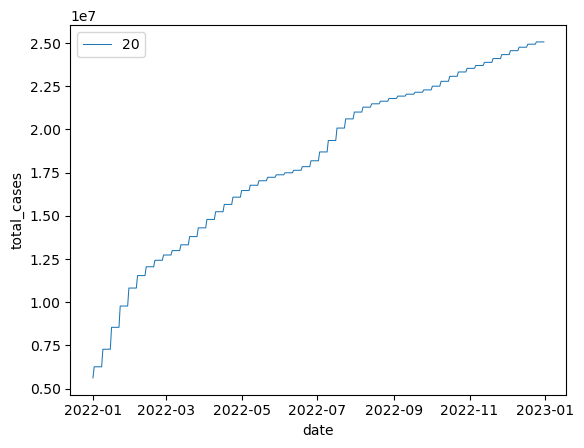

In [9]:
#mostriamo l'andamento dei casi totali del 2022

import seaborn as sns

sns.lineplot(x="date",y="total_cases",data=italia2022,size=20)

<Axes: xlabel='date', ylabel='new_cases'>

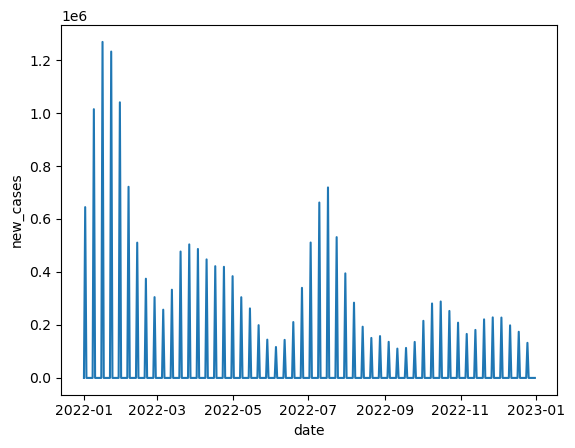

In [10]:
#mostriamo l'andamento dei nuovi casi escludendo però i dati giornalieri nulli

italia2022 = italia2022.dropna(subset=["new_cases"])
sns.lineplot(x="date",y="new_cases",data=italia2022)

In [11]:
#4 mostrare in un boxplot ITALIA GERMANIA E FRANCIA la differenza tra queste nazioni 
#per il numero di pazienti in terapia intensiva (ICU) da maggio 2022 ad aprile 2023

ICUitalia=covid.loc[(covid["location"]=="Italy")&(covid["date"]>="2022-05-01")&(covid["date"]<="2023-04-30")]
ICUgermania=covid.loc[(covid["location"]=="Germany")&(covid["date"]>="2022-05-01")&(covid["date"]<="2023-04-30")]
ICUFrance=covid.loc[(covid["location"]=="France")&(covid["date"]>="2022-05-01")&(covid["date"]<="2023-04-30")]

<Axes: xlabel='location', ylabel='icu_patients'>

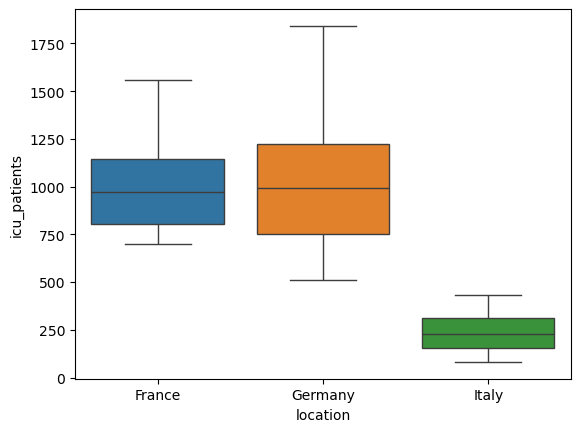

In [12]:
#creiamo il grafico - da modificare


ICUdata=pd.concat([ICUFrance,ICUgermania,ICUitalia])
sns.boxplot(x="location",y="icu_patients",hue="location",data=ICUdata)

In [13]:
#RELAZIONE SUL GRAFICO

#l'italia ha contenuto meglio il contaggio rispetto le altre due nazioni. 
#incrociando questi dati con quelli dei vaccini possiamo affermare che il programma vaccinale italiano (visto con il modulo excel)
#ha dato un buon esito (se paragonato ad altre nazioni)

In [14]:
#5 RIGUARDO ITALIA GERMANIA FRANCIA SPAGNA 2023
#A) MOSTRARE SOMMA PAZIENTI OSPITALIZZATI PER OGNUNA

italia2023=covid.loc[(covid["location"]=="Italy")&(covid["date"].dt.year==2023)]
Spagna2023=covid.loc[(covid["location"]=="Spain")&(covid["date"].dt.year==2023)]
Germania2023=covid.loc[(covid["location"]=="Germany")&(covid["date"].dt.year==2023)]
Francia2023=covid.loc[(covid["location"]=="France")&(covid["date"].dt.year==2023)]

In [15]:
print("i pazienti ospedalizzati in italia nell'anno 2023 sono:",italia2023["hosp_patients"].sum())
print("i pazienti ospedalizzati in spagna nell'anno 2023 sono:",Spagna2023["hosp_patients"].sum())
print("i pazienti ospedalizzati in germania nell'anno 2023 sono:",Germania2023["hosp_patients"].sum())
print("i pazienti ospedalizzati in francia nell'anno 2023 sono:",Francia2023["hosp_patients"].sum())

i pazienti ospedalizzati in italia nell'anno 2023 sono: 1175272.0
i pazienti ospedalizzati in spagna nell'anno 2023 sono: 354602.0
i pazienti ospedalizzati in germania nell'anno 2023 sono: 0.0
i pazienti ospedalizzati in francia nell'anno 2023 sono: 1382574.0


In [16]:

#notiamo subito che i dati della Germania presentano una problematica. Difatti i dati daily sono 0
#analizzando i dati emerge che la germania aveva report settimanali

print("i pazienti ospedalizzati in germania nell'anno 2023 sono:",Germania2023["weekly_hosp_admissions"].sum())

#per scrupolo ho fatto anche la somma dei pazienti ospedallizati su base settimanale.
#notiamo che i dati non coincidono rispettono quelli quotidiani

i pazienti ospedalizzati in germania nell'anno 2023 sono: 897776.0
i pazienti ospedalizzati in Spagna nell'anno 2023 sono: 299463.0
i pazienti ospedalizzati in italia nell'anno 2023 sono: 592019.0
i pazienti ospedalizzati in Francia nell'anno 2023 sono: 268117.0


In [17]:
#B)SE CI SONO DATI NULLI CON UN COMMENTO SCRIVERE SE POSSIBILE GESTIRLI TRAMITE SOSTITUZIONE O MENO

print("dati nulli per il report giornaliero italiano:",italia2023["hosp_patients"].isnull().sum())
print("dati nulli per il report giornaliero francese:",Francia2023["hosp_patients"].isnull().sum())
print("dati nulli per il report giornaliero Spagnolo:",Spagna2023["hosp_patients"].isnull().sum())
print("dati nulli per il report settimanale Francese:",Francia2023["weekly_hosp_admissions"].isnull().sum())

dati nulli per il report giornaliero italiano: 0
dati nulli per il report giornaliero francese: 275
dati nulli per il report giornaliero Spagnolo: 203
dati nulli per il report giornaliero Tedesco: 365


In [ ]:
#Tranne l'Italia ci sono molti dati nulli per ogni nazione
#ma a parer mio non è possibile sostituirli con altri valori 
#in quanto ogni nazione ha modalità di report differenti a seconda delle normative vigenti nei paesi

In [21]:
#PICCOLA NOTA PERSONALE IN MERITO ALL'ESERCIZIO N. 5
#le due colonne settimanali e giornaliere presentano un problema:
#ovvero il conteggio dei pazienti non è giornaliero ma cumulativo, cioè dei pazienti ospidalizzati alla data X
#ma non avendo a disposizione il numero dei DIMESSI giornalieri(o settimanali) non possiamo ricavare un numero preciso
#di ingressi

italia2023[["location","date","weekly_hosp_admissions","hosp_patients"]]

,location,date,weekly_hosp_admissions,hosp_patients
186367,Italy,2023-01-01,3912.0,8281.0
186368,Italy,2023-01-02,4109.0,8409.0
186369,Italy,2023-01-03,4009.0,8358.0
186370,Italy,2023-01-04,3839.0,8287.0
186371,Italy,2023-01-05,3711.0,8035.0
...,...,...,...,...
186727,Italy,2023-12-27,2978.0,7115.0
186728,Italy,2023-12-28,2903.0,7011.0
186729,Italy,2023-12-29,2865.0,6876.0
186730,Italy,2023-12-30,2845.0,6796.0
